# COVID hospitalizations and deaths in France: 2021 versus 2020

In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
covid_url = (
    "https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7"
)

In [4]:
df = pd.read_csv(covid_url, sep=";", parse_dates=["jour"], infer_datetime_format=True)
df = df.query("sexe == 0")  # sum male/female
df = df[["jour", "hosp", "dc"]]
df.head()

,jour,hosp,dc
0,2020-03-18,2,0
3,2020-03-18,41,11
6,2020-03-18,4,0
9,2020-03-18,3,0
12,2020-03-18,8,0


#### Sum of all departments for each day + number of deaths each day

In [5]:
df2 = df.groupby(by="jour").sum().reset_index()
df2["death"] = df2["dc"] - df2["dc"].shift()
df2 = df2.dropna()
df2["death"] = df2["death"].astype(int)
df2["dayofyear"] = df2.jour.dt.dayofyear
df2.head()

,jour,hosp,dc,death,dayofyear
1,2020-03-19,4073,327,109,79
2,2020-03-20,5226,450,123,80
3,2020-03-21,5900,525,75,81
4,2020-03-22,6954,632,107,82
5,2020-03-23,8673,860,228,83


In [6]:
def get_final_df(year):
    tdf = df2.query("jour.dt.year == @year")
    tdf = tdf[["dayofyear", "hosp", "death"]].set_index("dayofyear")
    return tdf

In [7]:
df_2020 = get_final_df(2020)
df_2021 = get_final_df(2021)

In [8]:
df_2021.tail()

,hosp,death
dayofyear,,
351,15410,162
352,15370,85
353,15528,75
354,15918,224
355,16076,210


#### Plot COVID hospitalizations

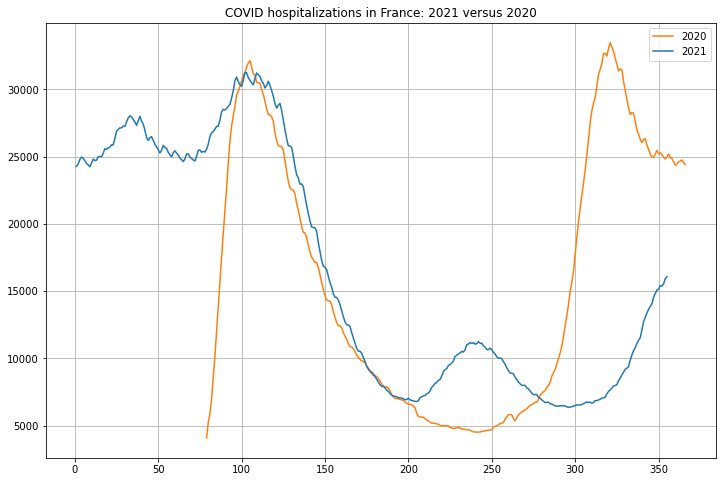

In [9]:
f, ax = plt.subplots(figsize=(12, 8))
df_2020["hosp"].plot(ax=ax, color="tab:orange", label="2020")
df_2021["hosp"].plot(ax=ax, color="tab:blue", label="2021")
ax.set_xlabel("")
plt.legend()
plt.grid()
plt.title("COVID hospitalizations in France: 2021 versus 2020")
plt.savefig("hospitalizations.png", dpi=100)
plt.show()

#### Plot COVID deaths

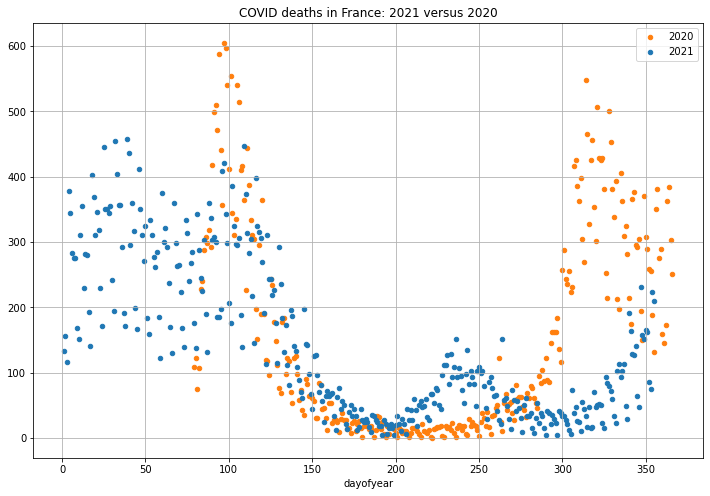

In [10]:
f, ax = plt.subplots(figsize=(12, 8))
df_2020.reset_index().plot(
    ax=ax, kind="scatter", x="dayofyear", y="death", color="tab:orange", label="2020"
)
df_2021.reset_index().plot(
    ax=ax, kind="scatter", x="dayofyear", y="death", color="tab:blue", label="2021"
)
ax.set_ylabel("")
plt.legend()
plt.grid()
plt.title("COVID deaths in France: 2021 versus 2020")
plt.savefig("deaths.png", dpi=100)
plt.show()